# Final Project

* In the United States, heart disease is the leading cause of death, accounting for one out of every four deaths. High blood pressure, high cholesterol, and smoking are all major risk factors for heart disease. Diabetes, obesity and overweight, physical inactivity, a poor diet, and excessive alcohol consumption are all medical problems and lifestyle choices that might increase the risk of heart disease. Heart disease risk can be considerably lowered by making lifestyle modifications and, in certain situations, taking medication.

The following are the goals of this project:
* Data on Missouri's leading causes of mortality from 2014 to 2017 is visualized and summarized.

* Evaluate Missouri residents' heart disease status at the county level, including heart disease mortality, heart disease hospitalizations, and emergency room visits, to see if there is a link between heart disease mortality and emergency room visits, average personal income, population density, and other variables.

* Examine whether there is a link between heart disease mortality and common risk factors in Missouri counties.

## 1. Data manipulation

#### Data Source

- Missouri leading causes of death information is retrieved from National center for health statistics in CDC website: https://www.cdc.gov/nchs/pressroom/states/missouri/missouri.htm.
- Heart disease profile data were downloaded as local files from Missouri Public Health Information Management System.
-  https://meric.mo.gov/data/income-measures/county-per-capita-personal-income, https://www.indexmundi.com/facts/united-states/quick-facts/missouri/land-area#table


#### Information about Missouri's major causes of mortality from 2014 to 2017.
The Missouri leading causes of death data were read from CDC website:https://www.cdc.gov/nchs/pressroom/states/missouri/missouri.htm
<br>


In [1]:
# Read tables from website
import pandas as pd
import numpy as np
from pathlib import Path
tables = pd.read_html('https://www.cdc.gov/nchs/pressroom/states/missouri/missouri.htm')

In [2]:
# 2014 -2017 Missouri leading causes of death data
data_2017 = tables[1]
data_2016 = tables[5]
data_2015 = tables[9]
data_2014 = tables[13]

In [3]:
# function used to change columns names, assign a new colunm.

def changeColumns (dataframe, x):
    """(dataframe, str) -> dataframe
    
    This function returns a dataframe with the names of the columns changed and a new column added."""
    
    a = dataframe.columns[0][:-6]
    b = dataframe.columns[1]
    c = dataframe.columns[2][:4]
    d = dataframe.columns[3][:-1]
    e = dataframe.columns[4][:-2]
    dataframe.columns = [a, b, c, d, e]
    dataframe['Year'] = x
    dataframe[a] = dataframe[a].str[3:]
    dataframe.iloc[9,0] = dataframe.iloc[9,0][1:]
    
    dataframe = dataframe[[a,'Year',b,c,d,e]].copy()
    return dataframe

In [4]:
# change data columns names
data_2017 = changeColumns(data_2017, 2017).copy()

In [5]:
data_2016 = changeColumns(data_2016, 2016)

In [6]:
data_2015 = changeColumns(data_2015, 2015)

In [7]:
data_2014 = changeColumns(data_2014, 2014)

In [8]:
# Merge 2014 - 2017 years' data
lcd_data = pd.concat([data_2014, data_2015, data_2016,data_2017])
lcd_data = lcd_data.reset_index()

In [9]:
lcd_data.columns

Index(['index', 'MO Leading Causes of Death', 'Year', 'Deaths', 'Rate',
       'State Rank', 'U.S. Rate'],
      dtype='object')

In [10]:
# long to wide pivoting tranformation
pdata = lcd_data.pivot(index='Year', columns='MO Leading Causes of Death', values=['Deaths','Rate'])

###  Data on heart disease death, hospitalization, and ER visits
View heart disease mortality, heart disease hospitalizations, and heart disease emergency room visits on a county level from local files. To obtain information about income and land area through website.
<br>
Death rates are age-adjusted and expressed as deaths per 100,000 of the population. The age-adjusted hospitalization and procedure rates are per 10,000 people, whereas the age-adjusted emergency department visit rates are per 1,000 people.

In [11]:
# function to read csv and excel files

class InputModule:
    def __init__(self, fileFormat: str = "EXCEL"):
        self.fileFormat = fileFormat.upper()
        self.dataFrame = None
        self.filterList = ['Statewide', 'County']
        self.dropList = ['Lower 95% Confidence Limit', 'Upper 95% Confidence Limit', 'Significantly Different']

    def readfiles(self, filePath: Path):
        try:
            if self.fileFormat.upper() == "EXCEL":
                self.dataFrame = pd.read_excel(filePath, header=2, skipfooter=3)
            elif self.fileFormat.upper() == "CSV":
                self.dataFrame = pd.read_csv(filePath, header=2, skipfooter=3)
            else:
                print("Invalid File Format. Read Failure")
                SystemExit(1)
        except Exception as e:
            print("File Read Failure!!!, Filename:" + str(filePath) + " FileFormat:" + self.fileFormat)
            SystemExit(1)

        return self.dataFrame

    # function to filter data, drop columns, change columns names
    def formatDataFrame(self, pre: str, formatType: int = 1):
        self.dataFrame = self.dataFrame[self.dataFrame['Geography Type'].isin(self.filterList)]
        self.dataFrame = self.dataFrame.drop(
            self.dropList, axis=1)

        self.dataFrame.columns = [self.dataFrame.columns[0],
                                  self.dataFrame.columns[1],
                                  pre + '_' + self.dataFrame.columns[2] if type == 1 else self.dataFrame.columns[2],
                                  pre + '_' + self.dataFrame.columns[3],
                                  pre + '_' + self.dataFrame.columns[4]]

    def getDataFrame(self):
        return self.dataFrame


In [12]:
# read heart disease data from local files.
    hd_data = InputModule('csv')
    hd_data.readfiles('coronary.csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2019,"207,371",4.4,3.8,4.9,NaN
1,Central,BRFSS Region,2019,"25,686",4.5,2.8,6.2,N/S
2,Kansas City Metro,BRFSS Region,2019,"28,688",3.0,2.0,4.0,L
3,Northeast,BRFSS Region,2019,"10,691",5.6,3.4,7.8,N/S
4,Northwest,BRFSS Region,2019,"10,080",5.4,3.3,7.5,N/S
...,...,...,...,...,...,...,...,...
118,Washington,County,2019,"25,686",4.5,2.8,6.2,N/S
119,Wayne,County,2019,"24,660",5.7,4.2,7.2,N/S
120,Webster,County,2019,"42,127",5.7,3.8,7.7,N/S
121,Worth,County,2019,"10,080",5.4,3.3,7.5,N/S


In [13]:
# heart disease mortality data
    hdm_data = InputModule('excel')
    hdm_data.readfiles('mortality_data.xlsx')


,Geography,Geography Type,Data Years,Count,Rate,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2009 - 2019,157199,193.95,192.99,194.91,NaN
1,Central,BRFSS Region,2009 - 2019,17511,192.46,189.61,195.31,N/S
2,Kansas City Metro,BRFSS Region,2009 - 2019,25252,168.64,166.56,170.72,L
3,Northeast,BRFSS Region,2009 - 2019,8010,199.59,195.22,203.96,H
4,Northwest,BRFSS Region,2009 - 2019,6704,201.59,196.76,206.42,H
...,...,...,...,...,...,...,...,...
150,Washington,County,2009 - 2019,1048,349.25,328.10,370.40,H
151,Wayne,County,2009 - 2019,405,183.93,166.45,202.75,N/S
152,Webster,County,2009 - 2019,915,206.99,193.58,220.40,N/S
153,Worth,County,2009 - 2019,66,135.79,105.02,172.76,L


In [14]:
# data for emergency room visits discharges with a principal diagnosis of heart disease
    erv_data = InputModule('excel')
    erv_data.readfiles('emergency_room_visits_data.xlsx')


,Geography,Geography Type,Data Years,Count,Rate,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2011 - 2015,470474,15.12,15.08,15.16,NaN
1,Central,BRFSS Region,2011 - 2015,54106,14.82,14.70,14.94,L
2,Kansas City Metro,BRFSS Region,2011 - 2015,100792,16.44,16.34,16.54,H
3,Northeast,BRFSS Region,2011 - 2015,23416,16.72,16.51,16.93,H
4,Northwest,BRFSS Region,2011 - 2015,19594,15.78,15.56,16.00,H
...,...,...,...,...,...,...,...,...
150,Washington,County,2011 - 2015,3569,26.96,26.08,27.84,H
151,Wayne,County,2011 - 2015,1127,15.33,14.43,16.23,N/S
152,Webster,County,2011 - 2015,2062,11.41,10.92,11.90,L
153,Worth,County,2011 - 2015,180,13.71,11.78,15.87,N/S


In [15]:
# data: hospitalizations discharges with a principal diagnosis of heart disease
    hd_discharge = InputModule('excel')
    hd_discharge.readfiles('hospitalization_data.xlsx')

,Geography,Geography Type,Data Years,Count,Rate,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2011 - 2015,384331,109.46,109.11,109.81,NaN
1,Central,BRFSS Region,2011 - 2015,41441,103.88,102.88,104.88,L
2,Kansas City Metro,BRFSS Region,2011 - 2015,76109,115.51,114.69,116.33,H
3,Northeast,BRFSS Region,2011 - 2015,17452,105.14,103.58,106.70,L
4,Northwest,BRFSS Region,2011 - 2015,15067,108.16,106.43,109.89,N/S
...,...,...,...,...,...,...,...,...
150,Washington,County,2011 - 2015,2181,149.54,143.26,155.82,H
151,Wayne,County,2011 - 2015,1514,155.74,147.89,163.59,H
152,Webster,County,2011 - 2015,2125,105.49,101.00,109.98,N/S
153,Worth,County,2011 - 2015,137,81.55,68.47,96.41,L


In [16]:
# transform data columns and filter data
    hd_data.formatDataFrame('Heart Disease')
    hdm_data.formatDataFrame('HD Mortality')
    erv_data.formatDataFrame('HD Emergency Room Visits')
    hd_discharge.formatDataFrame('HD Hospitalizations')

In [17]:
from functools import reduce

In [18]:
# Merge data
hdmc_data = reduce(lambda x,y: pd.merge(x,y, on=["Geography", "Geography Type"], how='left'), [hdm_data.getDataFrame(),
                                                                                                hd_data.getDataFrame(),
                                                                                                erv_data.getDataFrame(),
                                                                                                hd_discharge.getDataFrame()])

In [19]:
#Retrieve personal income data from website
pcpi= pd.read_html('https://meric.mo.gov/data/income-measures/county-per-capita-personal-income', header = 1)
len(pcpi)

2

In [20]:
pcpi1 = pcpi[1]

In [21]:
# reshape dataframe
pi1 = pcpi1[pcpi1.columns[0:3]]
pi2 = pcpi1[pcpi1.columns[5:8]]
pi2.columns = pi1.columns
pi2['Area'] = pi2['Area'].replace(['St. Louis', 'St. Louis City'], ['St. Louis City', 'St. Louis County'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
pi = pi1.append(pi2)
pi.columns = ['Geography', '2016 Per Capita Income', '2017 Per Capita Income']

In [23]:
# Convert income data to numeric and append to heart disease mortality dataframe.
pi['2016 Per Capita Income'] = pi['2016 Per Capita Income'].str[1:].str.replace(',', '').astype(float)
pi['2017 Per Capita Income'] = pi['2017 Per Capita Income'].str[1:].str.replace(',', '').astype(float)
hdmc_data['2016 Per Capita Income'] = pi['2016 Per Capita Income'].values
hdmc_data['2017 Per Capita Income'] = pi['2017 Per Capita Income'].values

In [24]:
# Retrieve county land area data
lands = pd.read_html('https://www.indexmundi.com/facts/united-states/quick-facts/missouri/land-area#table')
len(lands)

1

In [25]:
# Manipulate land area data: change data columns name, add Missouri land area data to first row, sort data by county names.
land = lands[0]
land.columns= ['Geography', 'Area']
new_row = pd.DataFrame({'Geography':'Missouri', 'Area': 68741.52}, index = [0])
land = pd.concat([new_row, land]).reset_index(drop = True)
land.iloc[101,0] = 'St. Louis county'
land = land.sort_values(by ='Geography')

In [26]:
hdmc_data.columns

Index(['Geography', 'Geography Type', 'Data Years_x', 'HD Mortality_Count',
       'HD Mortality_Rate', 'Data Years_y',
       'Heart Disease_Population Estimate', 'Heart Disease_Weighted Percent',
       'Data Years_x', 'HD Emergency Room Visits_Count',
       'HD Emergency Room Visits_Rate', 'Data Years_y',
       'HD Hospitalizations_Count', 'HD Hospitalizations_Rate',
       '2016 Per Capita Income', '2017 Per Capita Income'],
      dtype='object')

####  Risk factors for heart disease
To read heart disease risk factors data from local files - data downloaded from Missouri Public Health Information Management System. The data include Risk Factors for Heart Disease Among Adults 18 Years and Older.
<br>


In [27]:
# read adults 18 years and older with high blood pressure data by using readfiles function
high_bp = InputModule('csv')
high_bp.readfiles('blood pressure.csv')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2016,"1,590,674",33.8,32.9,34.8,NaN
1,Central,BRFSS Region,2016,"185,172",32.8,31.0,34.6,N/S
2,Kansas City Metro,BRFSS Region,2016,"313,842",33.5,30.4,36.6,N/S
3,Northeast,BRFSS Region,2016,"69,617",35.8,33.8,37.8,N/S
4,Northwest,BRFSS Region,2016,"60,439",32.2,29.2,35.3,N/S
...,...,...,...,...,...,...,...,...
118,Washington,County,2016,"8,260",43.2,36.3,50.0,H
119,Wayne,County,2016,"5,141",49.2,42.0,56.4,H
120,Webster,County,2016,"9,832",35.4,29.0,41.7,N/S
121,Worth,County,2016,728,45.1,33.8,56.5,N/S


In [28]:
# read high cholesterol data
high_chol = InputModule('excel')
high_chol.readfiles('high_cholestrol_data.xlsx')

,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2016,1661266,35.3,34.1,36.4,NaN
1,Central,BRFSS Region,2016,193076,34.2,32.2,36.2,N/S
2,Kansas City Metro,BRFSS Region,2016,352252,37.6,33.9,41.3,N/S
3,Northeast,BRFSS Region,2016,71173,36.6,34.3,38.9,N/S
4,Northwest,BRFSS Region,2016,60815,32.4,29.1,35.7,N/S
...,...,...,...,...,...,...,...,...
118,Washington,County,2016,9818,51.3,43.7,59.0,H
119,Wayne,County,2016,4526,43.3,35.8,50.8,H
120,Webster,County,2016,9244,33.3,26.2,40.3,N/S
121,Worth,County,2016,647,40.1,28.7,51.5,N/S


In [29]:
# read current smoking data
smoking = InputModule('excel')
smoking.readfiles('current smoking.xlsx')

,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2016,1035350,22.0,21.1,22.9,NaN
1,Central,BRFSS Region,2016,120813,21.4,19.7,23.1,N/S
2,Kansas City Metro,BRFSS Region,2016,208916,22.3,19.4,25.2,N/S
3,Northeast,BRFSS Region,2016,47837,24.6,22.5,26.7,H
4,Northwest,BRFSS Region,2016,42608,22.7,19.8,25.6,N/S
...,...,...,...,...,...,...,...,...
115,Texas,County,2016,5558,27.5,21.0,34.1,N/S
116,Vernon,County,2016,4369,27.8,21.5,34.1,N/S
117,Warren,County,2016,5916,23.1,16.8,29.4,N/S
118,Washington,County,2016,6767,35.4,28.1,42.6,H


In [30]:
# read diabetes data
diabetes = InputModule('excel')
diabetes.readfiles('diabetes_data.xlsx')

,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2016,522381,11.1,10.5,11.7,NaN
1,Central,BRFSS Region,2016,53068,9.4,8.5,10.4,L
2,Kansas City Metro,BRFSS Region,2016,113358,12.1,9.9,14.3,N/S
3,Northeast,BRFSS Region,2016,24697,12.7,11.4,14.1,H
4,Northwest,BRFSS Region,2016,17644,9.4,7.9,10.9,L
...,...,...,...,...,...,...,...,...
118,Washington,County,2016,2991,15.6,11.1,20.2,N/S
119,Wayne,County,2016,1701,16.3,11.1,21.4,N/S
120,Webster,County,2016,2386,8.6,5.6,11.5,N/S
121,Worth,County,2016,289,17.9,9.2,26.7,N/S


In [31]:
# read obesity data
obesity = InputModule('excel')
obesity.readfiles('obesity_data.xlsx')

,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2016,1468315,31.2,30.1,32.2,NaN
1,Central,BRFSS Region,2016,181220,32.1,30.1,34.1,N/S
2,Kansas City Metro,BRFSS Region,2016,267937,28.6,25.4,31.9,N/S
3,Northeast,BRFSS Region,2016,65144,33.5,31.4,35.6,N/S
4,Northwest,BRFSS Region,2016,61941,33.0,29.6,36.4,N/S
...,...,...,...,...,...,...,...,...
118,Washington,County,2016,7971,41.7,34.4,48.9,H
119,Wayne,County,2016,3126,29.9,23.1,36.7,N/S
120,Webster,County,2016,8066,29.0,22.6,35.4,N/S
121,Worth,County,2016,496,30.7,19.8,41.6,N/S


In [32]:
# read overweight data
over_wt = InputModule('excel')
over_wt.readfiles('overweight_data.xlsx')

,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2016,1656560,35.2,34.1,36.3,NaN
1,Central,BRFSS Region,2016,193076,34.2,32.2,36.2,N/S
2,Kansas City Metro,BRFSS Region,2016,342884,36.6,33.1,40.1,N/S
3,Northeast,BRFSS Region,2016,66506,34.2,32.0,36.4,N/S
4,Northwest,BRFSS Region,2016,68135,36.3,32.8,39.7,N/S
...,...,...,...,...,...,...,...,...
118,Washington,County,2016,5039,26.3,20.0,32.7,L
119,Wayne,County,2016,3585,34.3,27.3,41.3,N/S
120,Webster,County,2016,10134,36.5,29.2,43.7,N/S
121,Worth,County,2016,522,32.4,21.6,43.1,N/S


In [33]:
# read physical inactivity data
ph_inactive = InputModule('excel')
ph_inactive.readfiles('physical_inactivity_data.xlsx')

,Geography,Geography Type,Data Years,Population Estimate,Weighted Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Significantly Different
0,Missouri,Statewide,2016,1218889,25.9,25.0,26.8,NaN
1,Central,BRFSS Region,2016,137750,24.4,22.7,26.1,N/S
2,Kansas City Metro,BRFSS Region,2016,246389,26.3,23.3,29.4,N/S
3,Northeast,BRFSS Region,2016,58922,30.3,28.2,32.3,H
4,Northwest,BRFSS Region,2016,54433,29.0,25.8,32.1,N/S
...,...,...,...,...,...,...,...,...
118,Washington,County,2016,7065,36.9,29.9,43.9,H
119,Wayne,County,2016,3795,36.3,29.5,43.1,H
120,Webster,County,2016,8051,29.0,22.5,35.4,N/S
121,Worth,County,2016,508,31.5,21.6,41.5,N/S


In [34]:
# transform data frames
high_bp.formatDataFrame('High Blood Pressure',2)
high_chol.formatDataFrame('High Cholesterol',2)
smoking.formatDataFrame('Smoking',2)
diabetes.formatDataFrame('Diabetes',2)
obesity.formatDataFrame('Obesity',2)
over_wt.formatDataFrame('Overweight',2)
ph_inactive.formatDataFrame('Physical Inactivity',2)

In [35]:
ph_inactive.dataFrame.columns

Index(['Geography', 'Geography Type', 'Data Years',
       'Physical Inactivity_Population Estimate',
       'Physical Inactivity_Weighted Percent'],
      dtype='object')

In [36]:
from functools import reduce

In [37]:
# merge data
riskfactors = reduce(lambda x,y: pd.merge(x,y, on=["Geography", "Geography Type", "Data Years"], how='left'), [high_bp.getDataFrame(), high_chol.getDataFrame(), smoking.getDataFrame(), diabetes.getDataFrame(), obesity.getDataFrame(), over_wt.getDataFrame(), ph_inactive.getDataFrame()])

In [38]:
rf1 = hdmc_data[['Geography', 'Geography Type','2016 Per Capita Income']]

In [39]:
# Merge heart disease, heart disease mortality, population density, income data to risk factors data
hd_riskfactors = reduce(lambda x,y: pd.merge(x,y, on=["Geography", "Geography Type"], how='left'), [hd_data.getDataFrame(), hdm_data.getDataFrame(), riskfactors])

### 2. Data visualization

####  Missouri's major causes of mortality from 2014 to 2017

In [40]:
# long to wide to pivot leading causes data to show the death rate
lcd_data.pivot(index='Year', columns='MO Leading Causes of Death', values='Rate')

MO Leading Causes of Death,Accidents,Alzheimer’s disease,Cancer,Chronic Lower Respiratory Disease,Diabetes,Flu/Pneumonia,Heart Disease,Kidney Disease,Stroke,Suicide
Year,,,,,,,,,,
2014,41.0,27.4,177.7,51.4,19.4,18.1,194.7,19.6,48.7,16.3
2015,50.9,28.7,173.4,52.8,19.7,17.9,197.9,19.9,40.8,17.1
2016,57.0,30.0,167.0,52.1,20.1,15.1,192.1,19.6,40.4,18.4
2017,58.8,32.3,167.2,50.7,21.0,16.7,191.1,19.6,41.0,18.5


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

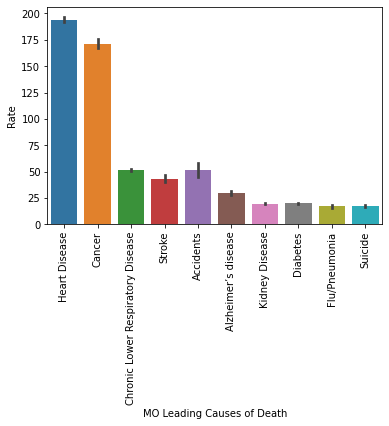

In [42]:
sns.barplot(x='MO Leading Causes of Death', y='Rate', data=lcd_data)
plt.xticks(rotation=90)

* Interpretation: According to the table and graph, Heart disease is the top cause of death in Missouri, with a modest decrease in the incidence from 2014 to 2017.

####  Missouri resident heart disease mortality, hospitalizaitons, emergency room visits data and the relations.

In [43]:
hdmc_data.head(2)

,Geography,Geography Type,Data Years_x,HD Mortality_Count,HD Mortality_Rate,Data Years_y,Heart Disease_Population Estimate,Heart Disease_Weighted Percent,Data Years_x,HD Emergency Room Visits_Count,HD Emergency Room Visits_Rate,Data Years_y,HD Hospitalizations_Count,HD Hospitalizations_Rate,2016 Per Capita Income,2017 Per Capita Income
0,Missouri,Statewide,2009 - 2019,157199,193.95,2019,"207,371",4.4,2011 - 2015,470474,15.12,2011 - 2015,384331,109.46,43587.0,44978.0
1,Adair,County,2009 - 2019,510,164.90,2019,"10,691",5.6,2011 - 2015,1839,15.50,2011 - 2015,1343,105.14,31186.0,32037.0


In [44]:
# Calulate the maximum and minimum values and display the counties with maxium value or minium value
filter = hdmc_data['Geography Type'] == 'County'
df = hdmc_data[filter]
columnlist = [ 'HD Mortality_Rate','Heart Disease_Weighted Percent', \
          'HD Emergency Room Visits_Rate', 'HD Hospitalizations_Rate','2016 Per Capita Income']

In [45]:
# Function to calulate the maximum and minimum values and display the counties with maxium value or minium value

def stat(df, columnlist):
    """(filepath, list) -> dataframe
    
    This function returns a new dataframe with statistic data."""
    sdata ={}
    for col in columnlist:
        ma = df[col].max()
        mal = df.loc[df[col] == df[col].max(), 'Geography'].values
        mi = df[col].min()
        mil = df.loc[df[col] == df[col].min(), 'Geography'].values
        me = df[col].mean()
        sdata[col] = {'County with maximum value': mal, 'Maximum value': ma, 'County with minimum value': mil, 'Minimum value': mi, \
                     'Average value': me}

    return(pd.DataFrame.from_dict(sdata))

In [46]:
stat(df, columnlist)

,HD Mortality_Rate,Heart Disease_Weighted Percent,HD Emergency Room Visits_Rate,HD Hospitalizations_Rate,2016 Per Capita Income
County with maximum value,[Pemiscot],"[Barry, Barton, Benton, Bollinger, Butler, Cap...",[Iron],[Iron],[St. Louis County]
Maximum value,351.32,5.7,33.03,176.16,64533
County with minimum value,[Worth],"[Bates, Caldwell, Cass, Clay, Clinton, Jackson...",[Lewis],[Lewis],[Douglas]
Minimum value,135.79,3,3.23,36.09,25511
Average value,211.157,5.10522,16.1329,107.662,35314.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9388e86a0>,
      dtype=object)

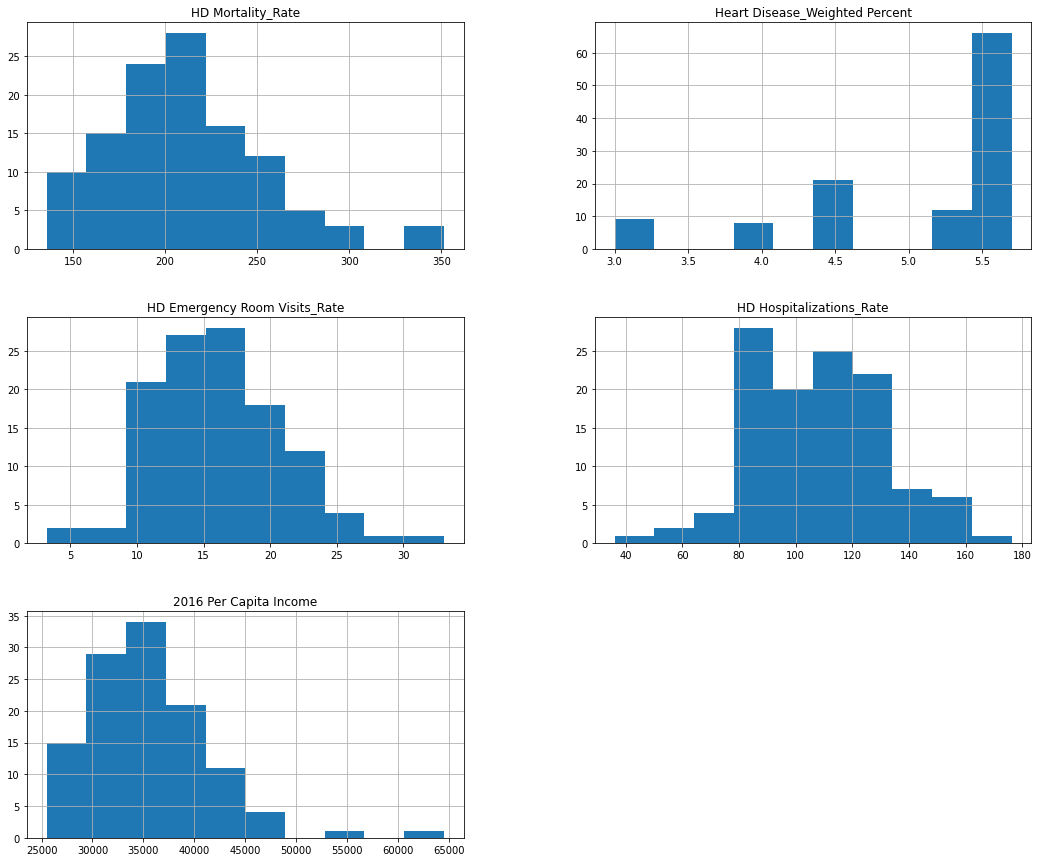

In [47]:
hdmc_data[columnlist].hist(figsize=(18,15))

In [48]:
hdmc_data['2016 Per Capita Income/1000'] = hdmc_data['2016 Per Capita Income']/1000

In [49]:
plist = hdmc_data[['HD Mortality_Rate','Heart Disease_Weighted Percent', 'HD Emergency Room Visits_Rate', \
          'HD Hospitalizations_Rate', '2016 Per Capita Income/1000']].copy()

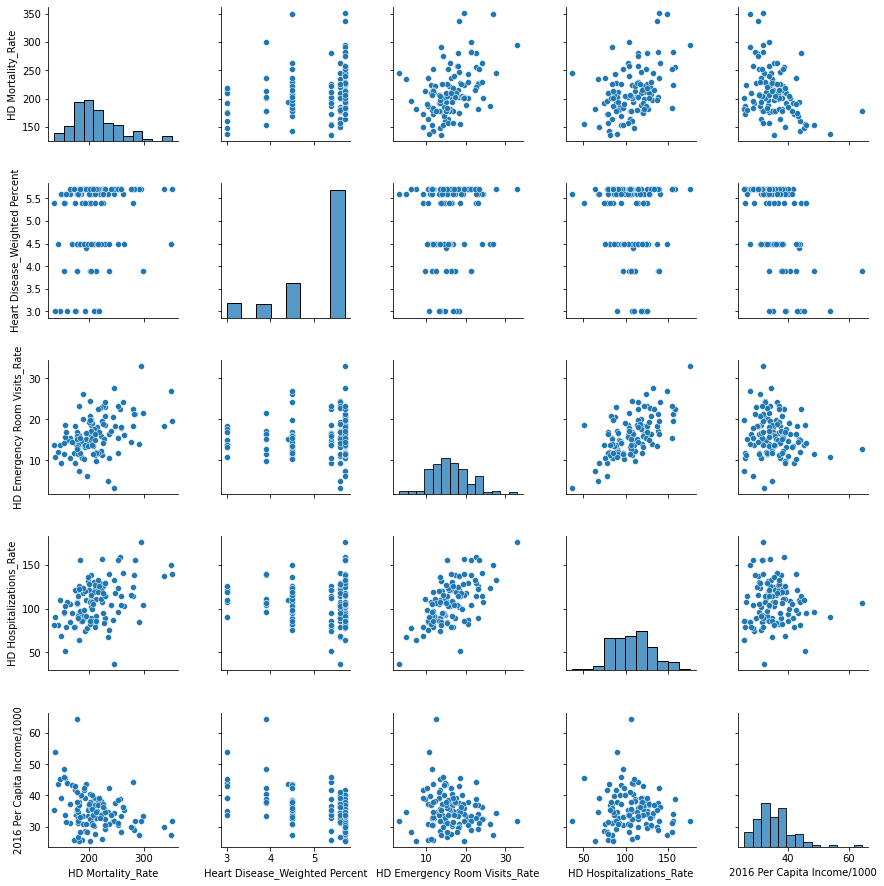

In [50]:
sns.pairplot(plist)

* Interpretation: According to the graphs, the incidence of heart disease death is linked to the rate of heart disease emergency department visits and heart disease hospitalization. The number of emergency department visits is linked to the number of inpatient discharges with a primary diagnosis of heart disease. Per capita income appears to be inversely associated with heart disease mortality in 2016.

Text(0.5, 0, 'Heart Disease Mortality_Rate')

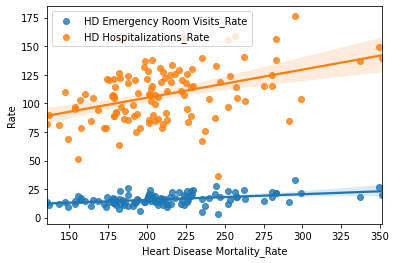

In [51]:
ax = sns.regplot(data=hdmc_data, x='HD Mortality_Rate', y='HD Emergency Room Visits_Rate', order=2, label='HD Emergency Room Visits_Rate')
sns.regplot(data=hdmc_data, x='HD Mortality_Rate', y='HD Hospitalizations_Rate', label='HD Hospitalizations_Rate', ax=ax)
ax.legend()
ax.set_ylabel('Rate')
ax.set_xlabel('Heart Disease Mortality_Rate')

Text(0.5, 0, 'Heart Disease Mortality_Rate')

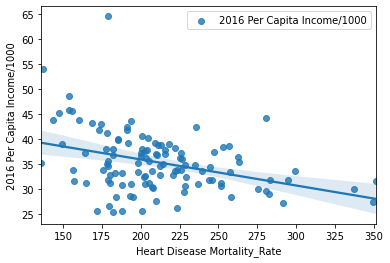

In [52]:
ax = sns.regplot(data=hdmc_data, x='HD Mortality_Rate', y='2016 Per Capita Income/1000', label='2016 Per Capita Income/1000')
ax.legend()
ax.set_ylabel('2016 Per Capita Income/1000')
ax.set_xlabel('Heart Disease Mortality_Rate')

#### Heart disease commom risk factors

In [53]:
hd_riskfactors.columns

Index(['Geography', 'Geography Type', 'Data Years_x',
       'Heart Disease_Population Estimate', 'Heart Disease_Weighted Percent',
       'Data Years_y', 'HD Mortality_Count', 'HD Mortality_Rate', 'Data Years',
       'High Blood Pressure_Population Estimate',
       'High Blood Pressure_Weighted Percent',
       'High Cholesterol_Population Estimate',
       'High Cholesterol_Weighted Percent', 'Smoking_Population Estimate',
       'Smoking_Weighted Percent', 'Diabetes_Population Estimate',
       'Diabetes_Weighted Percent', 'Obesity_Population Estimate',
       'Obesity_Weighted Percent', 'Overweight_Population Estimate',
       'Overweight_Weighted Percent',
       'Physical Inactivity_Population Estimate',
       'Physical Inactivity_Weighted Percent'],
      dtype='object')

In [54]:
# Calulate the maximum, minimum and average values and display the counties with maximum value or minimum value
filter = hd_riskfactors['Geography Type'] == 'County'
df2 = hd_riskfactors[filter]
columnlist2 = [ 'HD Mortality_Rate','Heart Disease_Weighted Percent', 'High Blood Pressure_Weighted Percent',\
               'High Cholesterol_Weighted Percent','Smoking_Weighted Percent','Diabetes_Weighted Percent','Obesity_Weighted Percent', \
               'Overweight_Weighted Percent','Physical Inactivity_Weighted Percent']

In [55]:
stat(df2, columnlist2)

,HD Mortality_Rate,Heart Disease_Weighted Percent,High Blood Pressure_Weighted Percent,High Cholesterol_Weighted Percent,Smoking_Weighted Percent,Diabetes_Weighted Percent,Obesity_Weighted Percent,Overweight_Weighted Percent,Physical Inactivity_Weighted Percent
County with maximum value,[Pemiscot],"[Barry, Barton, Benton, Bollinger, Butler, Cap...",[Iron],[Andrew],[Iron],[Iron],[Iron],[Andrew],[Livingston]
Maximum value,351.32,5.7,67.3,57.5,39.5,37.2,52.9,50.1,48.7
County with minimum value,[Worth],"[Bates, Caldwell, Cass, Clay, Clinton, Jackson...",[Johnson],[Shannon],[Osage],"[Cole, Ste. Genevieve]",[Platte],[Chariton],[Boone]
Minimum value,135.79,3,25.2,25.2,5.2,5.8,23.8,25.2,17.5
Average value,211.157,5.10522,37.5713,37.9791,23.4643,12.3948,33.4078,34.6243,29.2878


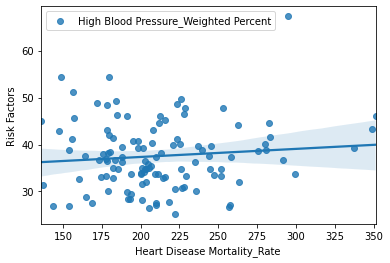

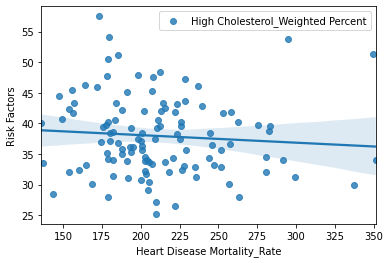

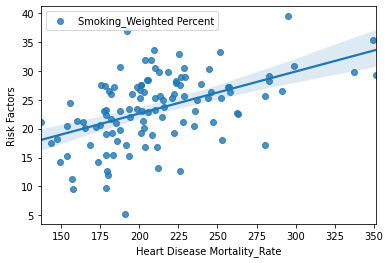

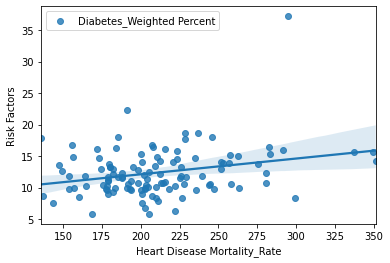

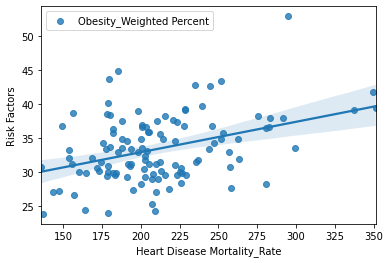

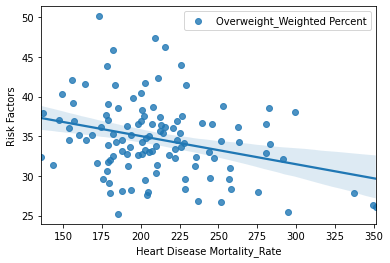

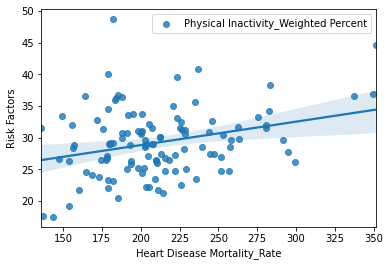

In [56]:
clists = columnlist2[2:]
for i in clists:
    ax = sns.regplot(data=hd_riskfactors, x='HD Mortality_Rate', y=i, label=i)
    ax.legend()
    ax.set_ylabel('Risk Factors')
    ax.set_xlabel('Heart Disease Mortality_Rate')
    plt.show()

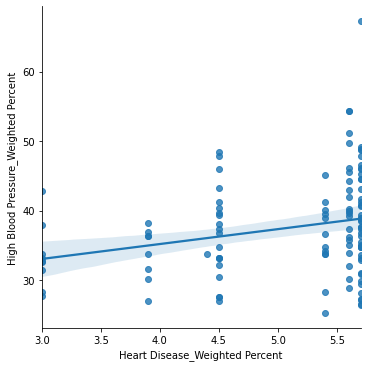

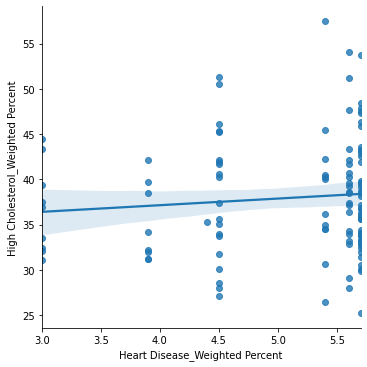

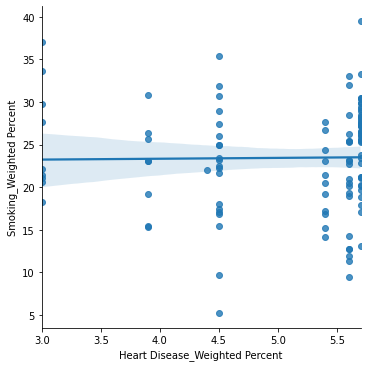

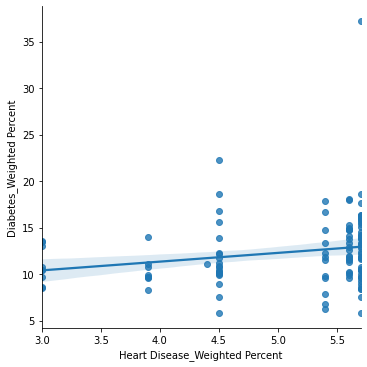

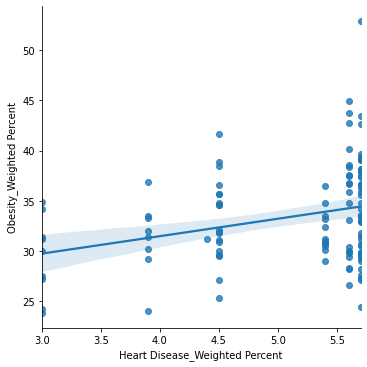

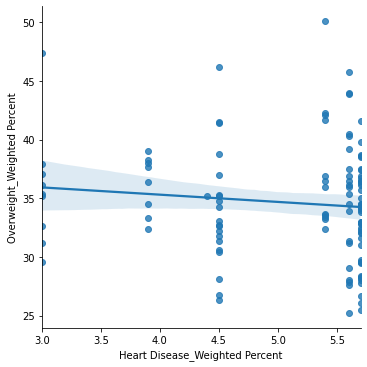

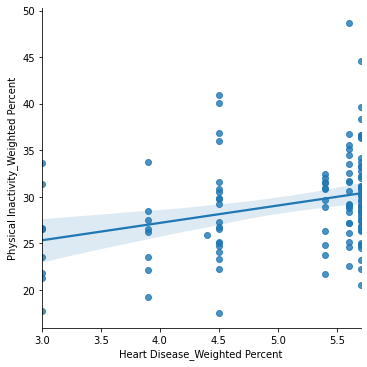

In [57]:
clists = columnlist2[2:]
for i in clists:
    ax = sns.lmplot(data=hd_riskfactors, x="Heart Disease_Weighted Percent", y=i)
    plt.show()

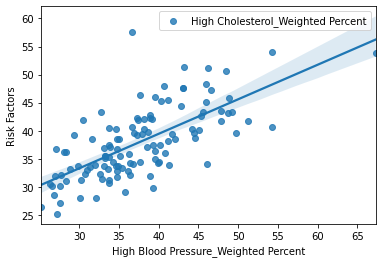

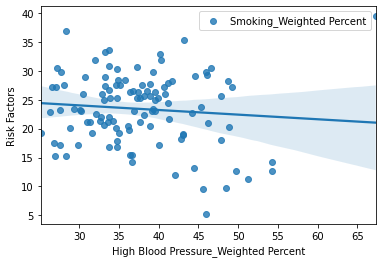

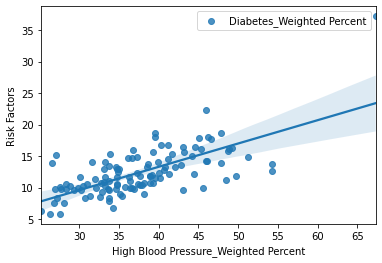

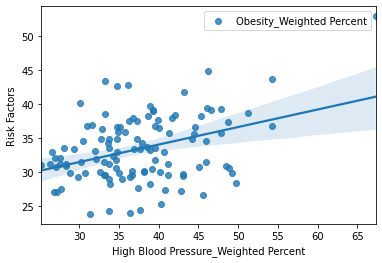

In [58]:
for i in columnlist2[3:7]:
    ax = sns.regplot(data=hd_riskfactors, x='High Blood Pressure_Weighted Percent', y=i, label=i)
    ax.legend()
    ax.set_ylabel('Risk Factors')
    ax.set_xlabel('High Blood Pressure_Weighted Percent')
    plt.show()

* Interpretation: It appears that current smoking, obesity, overweight, and physical inactivity have a positive connection with heart disease mortality. Heart disease and average personal income have negative connections.

### 3. Correlation Analysis

In [59]:
from scipy.stats import pearsonr

In [60]:
def correlations(dt1, dt2, columnlists):
    """(dataframe, dataframe, list) -> print
    
    This function calculate and print the coefficent and p-value."""
    for i in columnlists:
        a = pearsonr(dt1, dt2[i])
        print(dt1.name+', '+ i +': coefficent: {}, p-value: {}'.format(round(a[0], 5), round(a[1],5)))

In [61]:
correlations(hdmc_data['HD Mortality_Rate'], hdmc_data, columnlist[2:])

HD Mortality_Rate, HD Emergency Room Visits_Rate: coefficent: 0.43244, p-value: 0.0
HD Mortality_Rate, HD Hospitalizations_Rate: coefficent: 0.42996, p-value: 0.0
HD Mortality_Rate, 2016 Per Capita Income: coefficent: -0.36541, p-value: 5e-05


* Interpretation: Because the sample sizes are limited, certain correlation coefficients are not significant. Other state data could be added in the future to increase sample sizes.

---



### Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [62]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add Final.ipynb
    !git commit -a -m "Submitting the Final programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
	blood pressure.csv
	coronary.csv
	current smoking.xlsx
	diabetes_data.xlsx
	emergency_room_visits_data.xlsx
	high_cholestrol_data.xlsx
	hospitalization_data.xlsx
	mortality_data.xlsx
	obesity_data.xlsx
	overweight_data.xlsx
	physical_inactivity_data.xlsx
	../Untitled.ipynb
	../week02/
	../week04/week04_examples.ipynb
	../week04/week04_inclass.ipynb
	../week04/week04_lookups.ipynb
	../week05/californiaDDS.ipynb
	../week05/week05_inclass.ipynb
	../week06/module29-xml-examples.ipynb
	../week06/week06_inclass_1.ipynb
	../week07/week07_inclass.ipynb
	../week10/heart_2020_cleaned.csv
	../week11/complications_all.csv
	../week12/Untitled.ipynb
	../week13/blood pressure.csv
	../week13/coronary.csv
	../week13/current smoking.xlsx
	../week15/Electronic_Health_Record_EHR_Incentive_Program_Payments_to_Eligible_Hospitals.csv

nothing added to commit but untracked files present
Everything up-to-date
